# Crawling

## 학습목표
 1. 쿠키(Cookie)와 세션(Session) 이해
 2. 로그인이 필요한 웹페이지 크롤링 이해 및 실습

### 1. 쿠키(Cookie)와 세션(Session)
 - HTTP Request 를 전송하면, 서버는 HTML 파일을 전달하고, 해당 요청은 완료된다.
 - HTTP 프로토콜은 연결을 유지하기 어려운 구조로 되어 있음<br>
   . 요청-응답 후 연결이 끊기는 구조(사용자 입력 정보등 상태 정보 활용이 어려운 구조임)
 - 상태 관리 정보를 저장하는 방식으로 쿠키(cookie)와 세션(session) 기법이 나옴
 
#### 1.1 쿠키(cookie): 상태 정보를 클라이언트에 저장하는 방식
 1. HTML 페이지를 웹 서버에 요청
 2. 웹 서버에서 쿠키(cookie) 생성
 3. 웹 서버 응답(HTML 페이지를 돌려줄 때) HTTP 헤더에 쿠키를 포함해서 전송 
``` 
Set−Cookie: id=korea123
``` 
 4. 전달받은 쿠키는 웹브라우저에서 관리하고 있다가, 다음 요청 때 쿠키를 함께 전송
```
Cookie: id=korea123
```
 5. 서버에서는 쿠키 정보를 읽어 이전 상태 정보를 확인
 6. 필요시 서버가 쿠키 정보를 변경해서 응답시 변경된 쿠키와 함께 응답

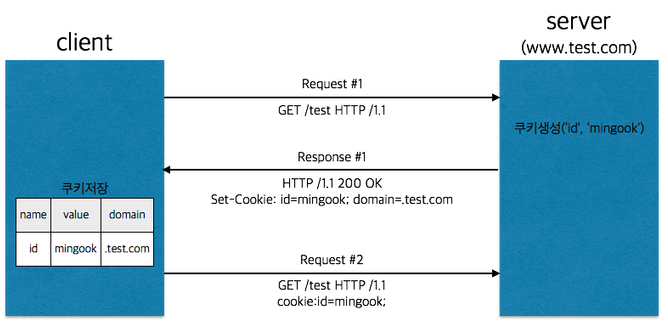

#### 1.2 세션(session): 상태 정보를 웹 서버에 저장하는 방식
1. 웹브라우저가 웹 서버에 요청하게 되면, 웹 서버가 해당 웹브라우저(클라이언트)에 유일한 ID(세션 ID)를 부여함
2. 해당 세션 ID는 응답(HTML 페이지를 돌려줄 때) HTTP 헤더에 넣어져 전달된다.
``` 
Set−Cookie: PHPSESSID=pi0fo9v2kdi5nuha3bcgiu8fq2
``` 
3. 웹브라우저는 이후 웹브라우저를 닫기 까지 해당 웹 서버 요청할 때 부여된 세션 ID를 HTTP 헤더에 넣어서 전달한다.
``` 
Cookie: PHPSESSID=pi0fo9v2kdi5nuha3bcgiu8fq2
``` 
4. 웹 서버는 세션 ID를 확인하고, 해당 세션에 관련된 정보를 확인한 후, HTML 페이지를 돌려준다.
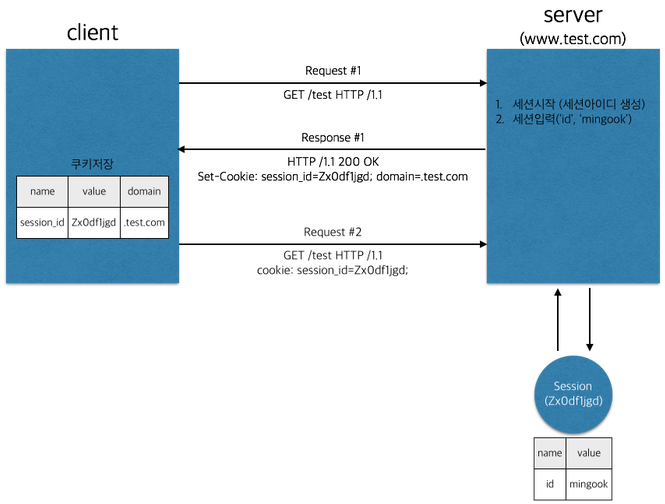

### 2. 로그인이 필요한 웹페이지 크롤링 이해 및 실습
 - 로그인이 필요한 웹페이지는 쿠키 또는 세션을 사용하는 경우가 일반적입니다.

#### 2.1 한빛미디어 홈페이지(http://www.hanbit.co.kr) 마일리지 크롤링 
   - 마일리지를 확인하기 위해 로그인 정보가 필요함
   - 세션으로 관리되고 있음을 코드를 통해 확인
   - 세션 정보를 획득하고, 이를 사용해서 마일리지 페이지에 접근하여 마일리지 점수 확인

#### 2.1.1 로그인 페이지 분석
 - http://www.hanbit.co.kr/member/login.html
 - form 태그를 통해 ID/PW가 전달되는 것이 일반적이므로 해당 코드 확인 (웹브라우저에서 해당 웹페이지 소스보기로 확인)
 - 다음 두 태그가 코드를 이해하는데 핵심
``` 
<form name="frm"  id="frm"  action="#" method="post">
<input  type="button" name="login_btn"  id="login_btn" value="로그인" class="btn_login" >					
``` 

 - javascript를 간결하게 만들기 위한 라이브러리인 jQuery 코드를 확인할 필요가 있음

 - id가 login_btn 인 태그(input type="button")가 click 되었을 때 login_proc() 함수를 호출하게 되어 있음

 - id가 frm 인 태그(form 태그)에 action 속성을 login_proc.php 로 바꿔주고, 전송하게 되어 있음

 - 즉, 버튼을 누르면 login_proc.php 웹페이지에 m_id 값과 m_passwd 값을 넣어 전송해줌
 - 마일리지는 http://www.hanbit.co.kr/myhanbit/myhanbit.html 페이지에서 CSS Selector로 확인

In [10]:
import requests
from bs4 import BeautifulSoup

login_url = 'http://www.hanbit.co.kr/member/login_proc.php'

user = 'tenial'
password = 'korea123'

# requests.session 메서드는 해당 reqeusts를 사용하는 동안 cookie를 header에 유지하도록 하여
# 세션이 필요한 HTTP 요청에 사용됩니다.
session = requests.session()

params = dict()
params['m_id'] = user
params['m_passwd'] = password

# javascrit(jQuery) 코드를 분석해보니, 결국 login_proc.php 를 m_id 와 m_passwd 값과 함께
# POST로 호출하기 때문에 다음과 같이 requests.session.post() 메서드를 활용하였습니다.
res = session.post(login_url, data = params) 

# 응답코드가 200 즉, OK가 아닌 경우 에러를 발생시키는 메서드입니다.
res.raise_for_status() 

# 'Set-Cookie'로 PHPSESSID 라는 세션 ID 값이 넘어옴을 알 수 있다.
# print(res.headers)

# cookie로 세션을 로그인 상태를 관리하는 상태를 확인해보기 위한 코드입니다.
# print(session.cookies.get_dict()) 

# 여기서부터는 로그인이 된 세션이 유지됩니다. session 에 header에는 Cookie에 PHPSESSID가 들어갑니다.
mypage_url = 'http://www.hanbit.co.kr/myhanbit/myhanbit.html'
res = session.get(mypage_url)

# 응답코드가 200 즉, OK가 아닌 경우 에러를 발생시키는 메서드입니다.
res.raise_for_status() 

soup = BeautifulSoup(res.text, 'html.parser')

# Chrome 개발자 도구에서 CSS SELECTOR를 통해 간단히 가져온 CSS SELECTOR 표현식을 사용
he_coin = soup.select_one('#container > div > div.sm_mymileage > dl.mileage_section2 > dd > span')

# 다음과 같이 class를 .mileage_section2 로 그리고 그 하부 태그중에 span이 있다는 식으로 표현도 가능함
# he_coin = soup.select_one('.mileage_section2 span')

print ('mileage is', he_coin.get_text())

mileage is 5,650
